In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

In [2]:
#Load the user-item matrix
user_item = os.path.join("..", "Data", "Cleaned-Data", "merged_matrix_implicit.csv")

In [3]:
#Turn the matrix into a dataframe
user_item_df = pd.read_csv(user_item)

In [4]:
user_item_df.head()

,A Kiss Remembered,All He Ever Wanted: A Novel,Always Daddy's Girl: Understanding Your Father's Impact on Who You Are,Angels &amp; Demons,Atonement : A Novel,Before I Say Good-Bye,Black Beauty (Illustrated Classics),Bless The Beasts And Children : Bless The Beasts And Children,Blood Oath,Breathing Lessons,...,Yojimbo (1961),You Can't Take It With You (1938),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),Zero Effect (1998),eXistenZ (1999)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


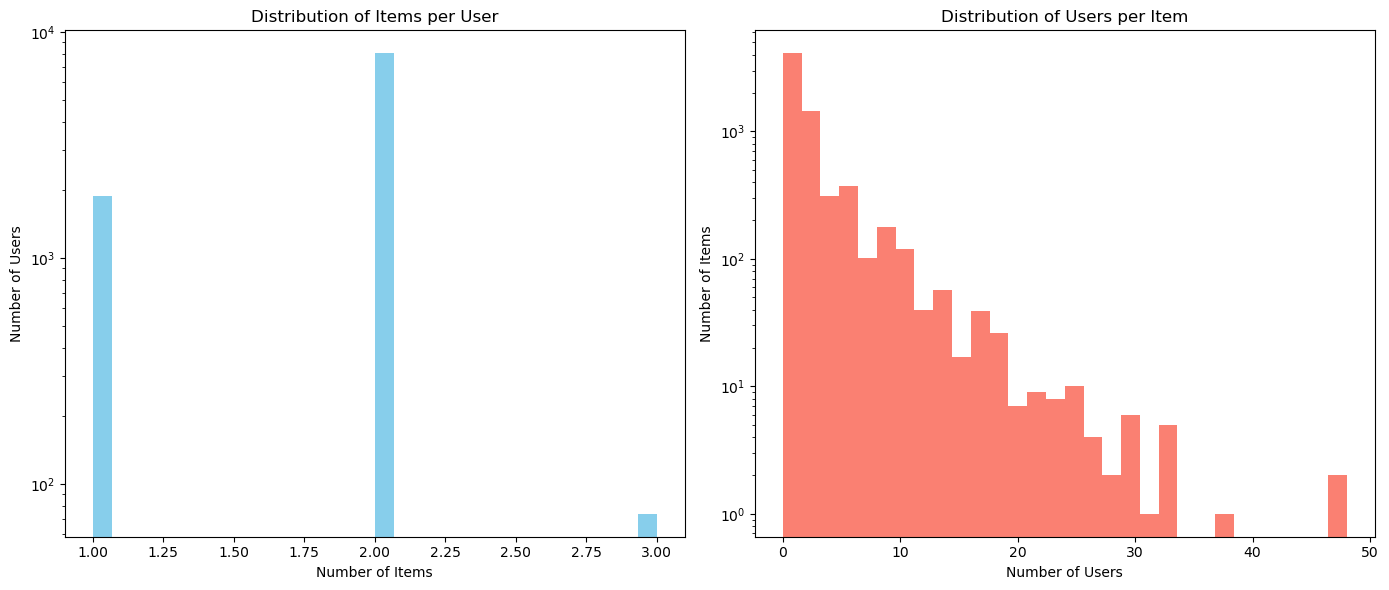

In [5]:
# Calculate non-zero counts per user
user_density = user_item_df.astype(bool).sum(axis=1)

# Calculate non-zero counts per item
item_density = user_item_df.astype(bool).sum(axis=0)

# Plotting the distribution of non-zero counts per user
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.hist(user_density, bins=30, color='skyblue', log=True)
plt.title('Distribution of Items per User')
plt.xlabel('Number of Items')
plt.ylabel('Number of Users')

# Plotting the distribution of non-zero counts per item
plt.subplot(122)
plt.hist(item_density, bins=30, color='salmon', log=True)
plt.title('Distribution of Users per Item')
plt.xlabel('Number of Users')
plt.ylabel('Number of Items')

plt.tight_layout()
plt.show()

Distribution of items per user (left histogram): The majority of users have interacted with a very limited number of items. There are a few users who interact with many items but this is rare. 

Distribution of users per item (right histogram): Similarly most items are only interacted with by a few users, indicating that a small number of items might be extrememly popular, or that users might be interacting with very different items. 

Implications: The data being skewed could lead to heavy bias in the model predictions. The long tail might indicate that we need to explore more niche markets. 

In [6]:
#Converting the dataframe into a matrix
#user_item_sparse = csr_matrix(user_item_df.values)

In [7]:
# Randomly sample 5000 rows from the DataFrame without replacement (my computer cant really handle more)
user_item_sampled_df = user_item_df.sample(n=5000, random_state=42)

In [8]:
# Convert the sampled DataFrame to a sparse matrix
user_item_sampled_sparse = csr_matrix(user_item_sampled_df.values)

In [9]:
# Number of users
num_users = user_item_sampled_df.shape[0]

# Number of items
num_items = user_item_sampled_df.shape[1]

# Total number of interactions
total_interactions = user_item_sampled_sparse.nnz

# Average interactions per user
avg_interactions_per_user = total_interactions / num_users

# Average interactions per item
avg_interactions_per_item = total_interactions / num_items

print(f"Users: {num_users}")
print(f"Items: {num_items}")
print(f"Total interactions: {total_interactions}")
print(f"Average interactions per user: {avg_interactions_per_user:.2f}")
print(f"Average interactions per item: {avg_interactions_per_item:.2f}")

Users: 5000
Items: 6855
Total interactions: 9123
Average interactions per user: 1.82
Average interactions per item: 1.33


In [10]:
# Sparsity percentage
sparsity = 1 - (total_interactions / (num_users * num_items))
print(f"Sparsity: {sparsity:.2%}")

# Number of non-zero values per user
user_interaction_counts = user_item_sampled_sparse.getnnz(axis=1)

# Number of non-zero values per item
item_interaction_counts = user_item_sampled_sparse.getnnz(axis=0)

print("User Interaction Counts:")
print(pd.Series(user_interaction_counts).describe())

print("\nItem Interaction Counts:")
print(pd.Series(item_interaction_counts).describe())

Sparsity: 99.97%
User Interaction Counts:
count    5000.00000
mean        1.82460
std         0.40183
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         3.00000
dtype: float64

Item Interaction Counts:
count    6855.000000
mean        1.330853
std         1.952441
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        27.000000
dtype: float64


In [12]:
# Get the interaction counts for each item
item_interaction_counts = user_item_sampled_sparse.getnnz(axis=0)

# Convert the interaction counts to a pandas Series
item_interaction_series = pd.Series(item_interaction_counts)

# Get the count of users for each interaction count
interaction_count_distribution = item_interaction_series.value_counts().sort_index()

# Print the interaction count distribution
print("Interaction Count Distribution:")
print(interaction_count_distribution)

Interaction Count Distribution:
0     2377
1     2832
2      677
3      337
4      219
5      140
6       75
7       55
8       38
9       25
10      29
11      12
12       9
13       8
14      11
15       3
17       3
18       3
21       1
27       1
Name: count, dtype: int64


Given what we learned about from this round of EDA, the sparsity in our user-item matrix is large (>99%). The distribution of interactions to number of items is also very heavily skewed with a few items being interacted with by almost every user. To deal with this we wil attempt to remove any items with no interaction and also remove items with an atypical number of interactions. This should help us avoid a bit of bias in the system. 

Also it might benefit us here to get rid of any users with no interactions just to try our best to save space and cut down on the sparsity

In [13]:
# Find the item indices with non-zero interactions
item_nonzero_indices = np.where(item_interaction_counts > 0)[0]

# Filter the matrix to keep only items with non-zero interactions
user_item_filtered = user_item_sampled_sparse[:, item_nonzero_indices]

# Update interaction counts for the filtered items
filtered_interaction_counts = user_item_filtered.getnnz(axis=0)

# Find the item indices with interactions less than or equal to 30
item_indices_to_keep = np.where(filtered_interaction_counts <= 30)[0]

# Filter the matrix to keep only items with interactions less than or equal to 30
user_item_filtered = user_item_filtered[:, item_indices_to_keep]

# Find the user indices with non-zero interactions
user_nonzero_indices = np.where(user_item_filtered.getnnz(axis=1) > 0)[0]

# Filter the matrix to keep only users with non-zero interactions
user_item_filtered = user_item_filtered[user_nonzero_indices, :]

In [14]:
# Number of users after filtering
num_users_filtered = user_item_filtered.shape[0]

# Number of items after filtering
num_items_filtered = user_item_filtered.shape[1]

# Total number of interactions after filtering
total_interactions_filtered = user_item_filtered.nnz

# Average interactions per user after filtering
avg_interactions_per_user_filtered = total_interactions_filtered / num_users_filtered

# Average interactions per item after filtering
avg_interactions_per_item_filtered = total_interactions_filtered / num_items_filtered

print(f"Users after filtering: {num_users_filtered}")
print(f"Items after filtering: {num_items_filtered}")
print(f"Total interactions after filtering: {total_interactions_filtered}")
print(f"Average interactions per user after filtering: {avg_interactions_per_user_filtered:.2f}")
print(f"Average interactions per item after filtering: {avg_interactions_per_item_filtered:.2f}")

Users after filtering: 5000
Items after filtering: 4478
Total interactions after filtering: 9123
Average interactions per user after filtering: 1.82
Average interactions per item after filtering: 2.04


In [15]:
# Number of users after filtering
num_users_filtered = user_item_filtered.shape[0]

# Number of items after filtering
num_items_filtered = user_item_filtered.shape[1]

# Total number of interactions after filtering
total_interactions_filtered = user_item_filtered.nnz

# Calculate sparsity
sparsity_filtered = 1 - (total_interactions_filtered / (num_users_filtered * num_items_filtered))

print(f"Sparsity after filtering: {sparsity_filtered:.2%}")

Sparsity after filtering: 99.96%


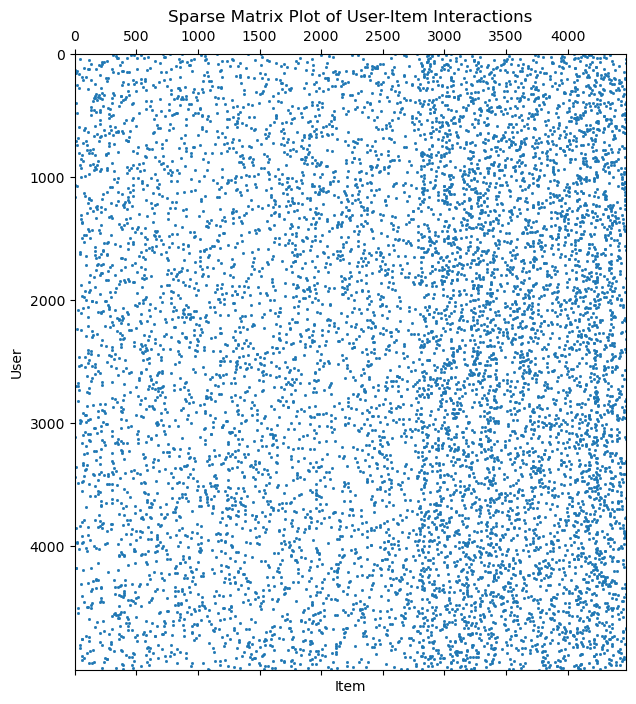

In [16]:
# Create a sparse matrix plot
plt.figure(figsize=(10, 8))
plt.spy(user_item_filtered, markersize=1)
plt.title('Sparse Matrix Plot of User-Item Interactions')
plt.xlabel('Item')
plt.ylabel('User')
plt.show()

We can really see the sparsity of the matrix here

In our EDA we investigated the user-item interaction data to gain insights and prepare the data for building a cross platform recommendation system. The main insights and observations from our EDA are as follows: 

- The user item matrix shows a high level of sparsity, with greater than 99% of the entries being zero. This indicates that most users have interacted with only a subset of items, this could be a significant challenge when building and training a model. 

- The distribution of interaction counts per user and per item were analyzed. A significant number of items had no interactions, while some items had a large number of interactions. Similarly, most users had a relatively low number of interactions. We removed the items with no interactions or a large number of interactions, we also removed any items with 0 interactions in order to minimize the presence of popular items and active users, which can potentially influence the recommendations.

- Due to the unavailability of user or item features, further analysis of feature correlations and their impact on interaction patterns could not be performed. The recommendation model will rely solely on the user-item interaction data.

Based on the insights gained from our EDA, the next step is to train a recommendation model using the preprocessed user item matrix. The high sparsity of the data suggests that we should use filterinig techniques designed for sparce matricies. Moving forward it will be important to evaluate the performnace of the recommendation model. Iterative refinement and experimentation with different algorithms and hyperparameters may be necessary to optimize the recommendations.

In [18]:
# Convert the sparse matrix to a DataFrame
user_item_df = pd.DataFrame.sparse.from_spmatrix(user_item_filtered)

In [19]:
# Define the path to the directory where you want to save the CSV files
save_directory = os.path.join("..", "Data", "Cleaned-Data")

In [20]:
# Define the file path
user_item_path = os.path.join(save_directory, 'user_item_filtered.csv')

In [21]:
# Save the DataFrame as a CSV file
user_item_df.to_csv(user_item_path, index=False)